1. ÌîÑÎ°úÏ†ùÌä∏ Î™©Ìëú
ÏßÅÏõêÎì§Ïùò Ïù¥ÏßÅ Ïó¨Î∂ÄÎ•º ÏÇ¨Ï†ÑÏóê ÏòàÏ∏°ÌïòÍ≥†, Ïù¥ÏßÅ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùÄ ÏßÅÏõêÍµ∞ÏùÑ ÏãùÎ≥ÑÌïòÏó¨ Î¶¨Ïä§ÌÅ¨ ÏôÑÌôî Î∞è Î¶¨ÌÖêÏÖò Ï†ÑÎûµÏùÑ ÏàòÎ¶ΩÌï®.

2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è Ï§ÄÎπÑ
* Í≥†Ï†ïÍ∞í Ï†úÍ±∞
* Ïù¥ÏßÑ ÌîºÏ≤ò > 0/1 Î≥ÄÌôò
* Îã§Ï§ë Î≤îÏ£ºÌòï ÌîºÏ≤ò > Lable Encoding Ï†ÅÏö©
* Í≤∞Ï∏°Ïπò ÏóÜÏùå.

3. ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨
* scale_pos_weight = 5.2 ÏÑ§Ï†ï ‚Üí Ïù¥ÏßÅÏûê ÌÅ¥ÎûòÏä§ Î≥¥ÏôÑ ÌïôÏäµ
* scale_pos_weight = negative / positive = 1233 / 237 = 5.2
 
4. Î™®Îç∏ÎßÅ
* ÏÇ¨Ïö© Î™®Îç∏: XGBoostClassifier  Logistic Regression / Random Forest / LightGBM / CatBoost
* ÏÑ±Îä• ÌèâÍ∞Ä: ÍµêÏ∞®Í≤ÄÏ¶ù(Stratified KFold, n=5)
* ÌîºÏ≤ò ÏÑ†ÌÉù: RFE (Recursive Feature Elimination) Í∏∞Î∞ò ‚Üí 10Í∞ú ÌïµÏã¨ ÌîºÏ≤ò Ï∂îÏ∂ú

5. SHAP Í∏∞Î∞ò Ïù∏ÏÇ¨Ïù¥Ìä∏ ÎèÑÏ∂ú
* OverTime
* MonthlyIncome < 3500
* JobSatisfaction <= 2 (Î∂àÎßåÏ°± ~ Î≥¥ÌÜµ)
* YearWithCurrmanager < 2
* JobRole in ['Sales Executive', 'Laboratory Technician']
> Ìï¥Îãπ Ï°∞Ìï©Ïóê Ìï¥ÎãπÌïòÎäî ÏßÅÏõêÍµ∞ÏùÄ Ïù¥ÏßÅÎ•† 45% Ïù¥ÏÉÅ

6. Ï†úÏïà
* ÏóÖÎ¨¥ÌôòÍ≤Ω Í∞úÏÑ† - ÏïºÍ∑º ÎπàÎèÑ ÎÜíÏùÄ Î∂ÄÏÑúÏóê ÎåÄÌï¥ ÏóÖÎ¨¥ Ïû¨Ï°∞Ï†ï or ÏûêÎèôÌôî ÎèÑÏûÖ Í≥†Î†§
* Jobsatisfaction ÎÇÆÏùÄ ÏßÅÏõêÏóê ÎåÄÌïú 1:1 ÏÉÅÎã¥
* Í∏âÏó¨ Ï†ïÏ±Ö - ÌïòÏúÑ 25% Í∏âÏó¨ Íµ¨Í∞Ñ + ÏïºÍ∑º ÎßéÏùÄ ÏßÅÏõê ÎåÄÏÉÅ Î≥µÏßÄ, Î≥¥ÏÉÅ Í∏∞Ìöç
* Î¶¨ÌÖêÏÖò ÏãúÎÆ¨Î†àÏù¥ÏÖò - Í≥†ÏúÑÌóòÍµ∞ Î¶¨ÌÖêÏÖò ÌîÑÎ°úÍ∑∏Îû® ÌõÑ Ïù¥ÏßÅÎ•† Î≥ÄÌôî A/B ÏÑ§Í≥Ñ






In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score, confusion_matrix, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import shap

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


## 1. Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ 
* Ï¥ù 1,470Î™Ö ÏßÅÏõê, 35Í∞ú ÌäπÏÑ± Î≥¥Ïú† 
* ÌÉÄÍ≤ü: Attrition(Yes/No) Ïù¥ÏßÅ Ïó¨Î∂Ä 
* Ïù¥ÏßÅÏûê ÎπÑÏú®: ÏïΩ 16% (class imbalance Ï°¥Ïû¨)

ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï(Class Imbalance): ÌÉÄÍ≤ü Î≥ÄÏàò(ÏòàÏ∏°Ìï† Í∞í)Ïùò Î≤îÏ£º(Class)Í∞Ñ ÎπÑÏú® Ï∞®Ïù¥Í∞Ä ÌÅ∞ ÏÉÅÌô©

In [2]:
df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()
df['Attrition'].value_counts(normalize=True)


Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

## 2. Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏ 
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
# Í≥†Ï†ïÍ∞í ÏÇ≠Ï†ú
df.drop(['Over18', 'EmployeeNumber', 'StandardHours', 'EmployeeCount'], axis=1, inplace=True)

In [6]:
# Ïù¥ÏßÑ ÌîºÏ≤ò Ï≤òÎ¶¨
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['OverTime'] = df['OverTime'].map({'No': 0, 'Yes': 1})
df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0       1  ...                  3                         1                 0   
1       0  ...                  4                         4                 1   
2       0  ...                  3                         2                 0   
3       1  ...                  3                         3                 0   
4       0  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

In [7]:
# Label Encoding 

# Î≤îÏ£ºÌòï ÌîºÏ≤ò ÎùºÎ≤® Ïù∏ÏΩîÎî© (split Ïù¥Ï†Ñ!!)
from sklearn.preprocessing import LabelEncoder
cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

## 3. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨, ÏôúÎèÑ, ÌÉÄÍ≤ü Í∞Ñ ÏÉÅÍ¥ÄÏÑ±, ÌîºÏ≤ò Î∂ÑÌè¨ Ï∞®Ïù¥Î•º ÏãúÍ∞ÅÌôîÎ°ú ÌôïÏù∏ 

In [8]:
df.corr()['Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
Gender                     -0.029453
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
NumCompaniesWorked          0.043494
Department                  0.063991
JobRole                     0.067151
D

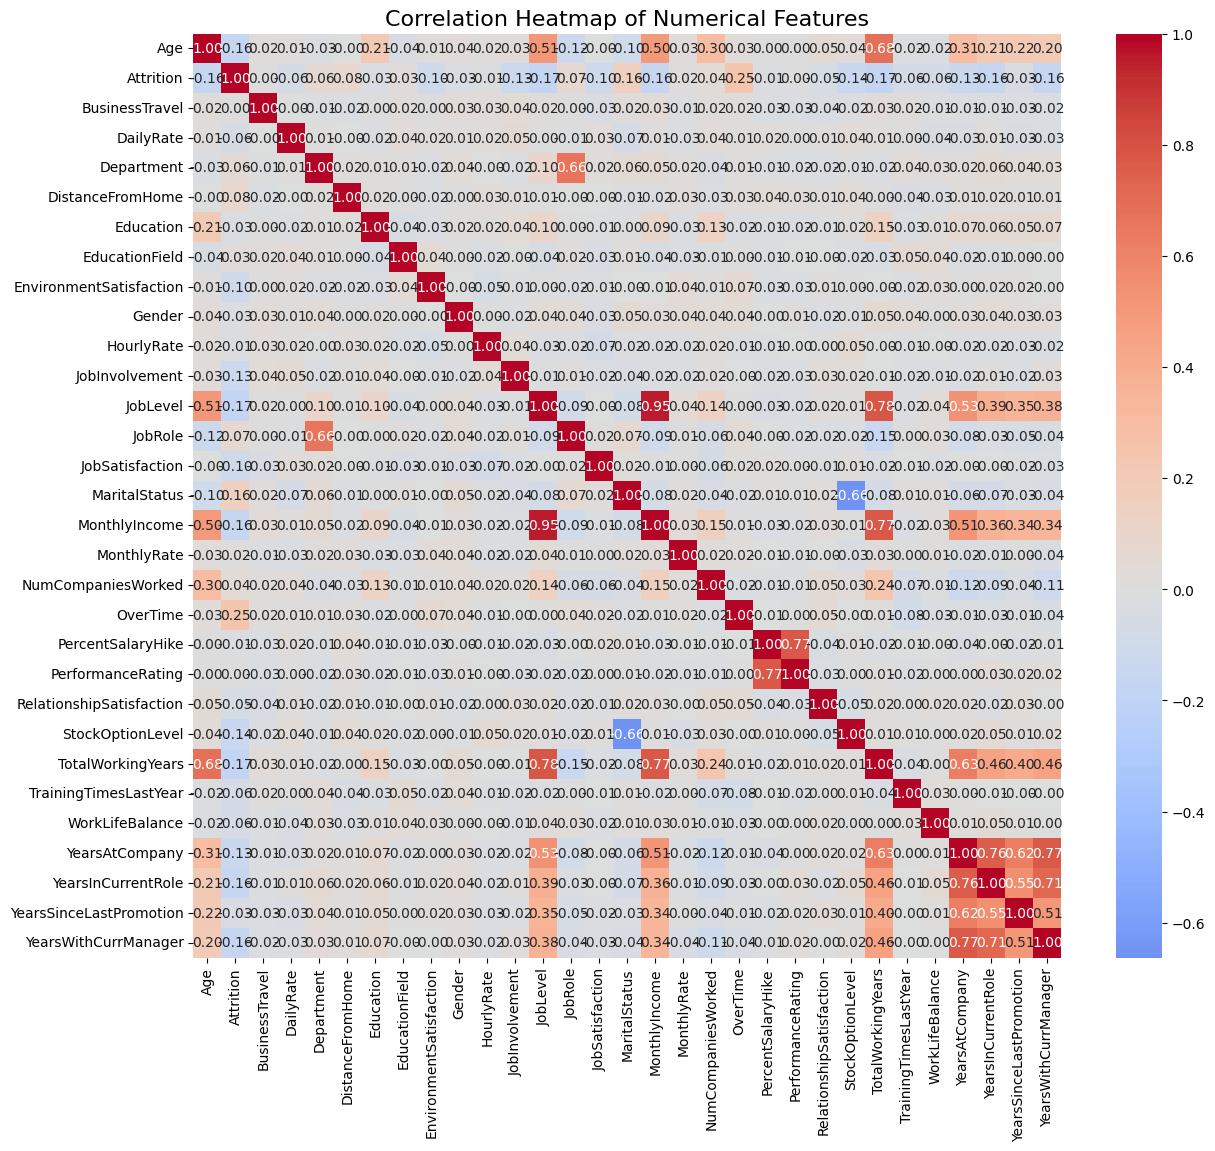

In [9]:
# 1. ÏàòÏπòÌòï ÌîºÏ≤òÎßå ÏÑ†ÌÉùÌï¥ÏÑú ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corr = df.select_dtypes(include='number').corr()

# 2. ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

1. Ï§ëÏöîÌïú ÌÉÄÍ≤ü ÏÉÅÍ¥ÄÌîºÏ≤ò ÌôïÏù∏(Attrition Í∏∞Ï§Ä)
* OverTime, Joblevel, TotalWorkingYears, MonthlyIncome, YearsInCurrentRole, YearsWithCurrManager

2. Ï§ëÎ≥µ ÌîºÏ≤ò ÌÉêÏßÄ / Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Í≥†Î†§
ÏÉÅÍ¥ÄÍ≥ÑÏàòÏóêÏÑú ÎÑàÎ¨¥ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ( > 0.8) Î•º Î≥¥Ïù¥Îäî ÌîºÏ≤òÎì§ÏùÄ Ï§ëÎ≥µÏù¥ ÏùòÏã¨ÎêúÎã§. 

3. ÏÑ§Î™ÖÎ†• ÏóÜÎäî ÌîºÏ≤òÎäî Ï†úÍ±∞ Í≥†Î†§ Í∞ÄÎä•
* Education, PerformanceRating, DistanceFromHome, NumCompaniesWorked
> Î™®Îç∏ ÌïôÏäµ - SHAP - RFE

4. Ïù∏ÏÇ¨Ïù¥Ìä∏ ÎèÑÏ∂ú
* ÏïºÍ∑º ÎßéÏùÄ ÏßÅÏõêÏùÄ Ïù¥ÏßÅ Í∞ÄÎä•ÏÑ±Ïù¥ 25% Îçî ÎÜíÎã§.
* Í∏âÏó¨ ÎÇÆÍ≥† ÏßÅÍ∏â ÎÇÆÏùÄ ÏßÅÏõêÏùò Ïù¥ÏßÅ ÏúÑÌóòÏù¥ ÎÜíÎã§
* ÏßÅÎ¨¥ Ïó∞ÏÜçÏÑ±Í≥º ÏÉÅÏÇ¨ Í∑ºÏÜç Í¥ÄÍ≥ÑÍ∞Ä Ïù¥ÏßÅÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§.



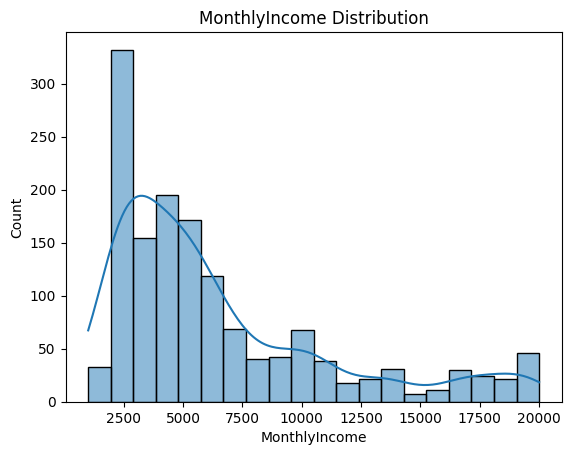

In [10]:
# ÌîºÏ≤ò Î∂ÑÌè¨ ÌôïÏù∏
sns.histplot(df["MonthlyIncome"], kde=True)
plt.title("MonthlyIncome Distribution")
plt.show()

Í∑∏ÎûòÌîÑ Ìï¥ÏÑù: Í∏âÏó¨Í∞Ä ÎÇÆÏùÄ ÏÇ¨ÎûåÏù¥ ÎßéÍ≥†, ÏùºÎ∂ÄÎßå Í≥†ÏÜåÎìùÏûêÏù¥Îã§. 

In [11]:
# ÏôúÎèÑ(Skewness) Í≥ÑÏÇ∞
df['MonthlyIncome'].skew()

1.3698166808390664

0 Ïóê Í∞ÄÍπåÏõÄ > Ï†ïÍ∑ú Î∂ÑÌè¨ 
0.5 or < -0.5 Îäî ÏôúÎèÑ ÌÅ¨Îã§.(ÎπÑÎåÄÏπ≠ Î∂ÑÌè¨)

In [12]:
# Î°úÍ∑∏ Î≥ÄÌôò 
df['MonthlyIncome_log'] = np.log1p(df['MonthlyIncome'])

# Îã§Ïãú ÌôïÏù∏
df['MonthlyIncome_log'].skew()

0.28644837630693515

Î°úÍ∑∏ Î≥ÄÌôò
* Î™®Îç∏Ïù¥ Í∏âÏó¨Î•º ÎπÑÏÑ†ÌòïÏ†ÅÏúºÎ°ú Ìï¥ÏÑùÌï† Ïàò ÏûàÏùå. 
* Î°úÍ∑∏ Î≥ÄÌôòÌïòÎ©¥ Î∂ÑÌè¨Í∞Ä Ï¢Ä Îçî Ï†ïÍ∑úÏóê Í∞ÄÍπåÏõå Ïßê. 
* ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Ïì∏ Í≤ΩÏö∞ÏóêÎäî Î°úÍ∑∏Î≥ÄÌôò Ìö®Í≥ºÍ∞Ä ÌÅº. 


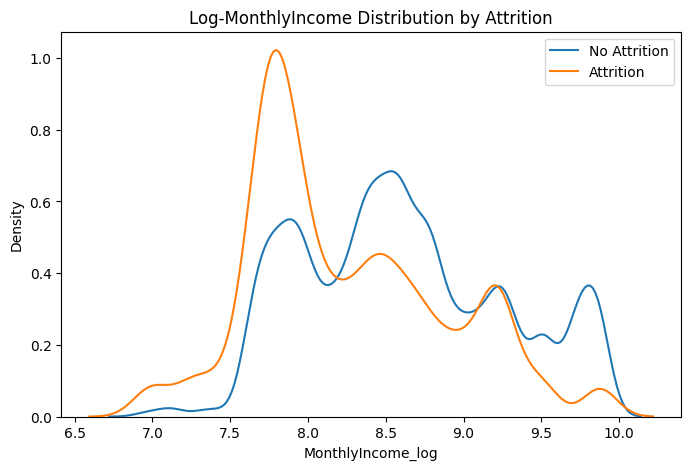

In [13]:
# Î°úÍ∑∏ Î≥ÄÌôòÎêú Ïª¨Îüº ÎßåÎì§Í∏∞
df['MonthlyIncome_log'] = np.log1p(df['MonthlyIncome'])

# Îã§Ïãú KDE ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df['Attrition'] == 0], x='MonthlyIncome_log', label='No Attrition', bw_adjust=0.5)
sns.kdeplot(data=df[df['Attrition'] == 1], x='MonthlyIncome_log', label='Attrition', bw_adjust=0.5)
plt.title("Log-MonthlyIncome Distribution by Attrition")
plt.legend()
plt.show()

In [14]:
def analyze_feature_by_target(df, feature, target='Attrition'):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    print(f"\n‚ñ∂Ô∏è Feature: {feature}")
    
    # 1. ÏôúÎèÑ
    skew = df[feature].skew()
    print(f"Skewness: {skew:.2f}")
    
    # 2. ÌûàÏä§ÌÜ†Í∑∏Îû®
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 3, 1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title("Distribution")
    
    # 3. ÌÉÄÍ≤üÎ≥Ñ KDE
    plt.subplot(1, 3, 2)
    sns.kdeplot(data=df[df[target] == 0], x=feature, label='No Attrition')
    sns.kdeplot(data=df[df[target] == 1], x=feature, label='Attrition')
    plt.title("By Target (KDE)")
    
    # 4. ÌÉÄÍ≤üÎ≥Ñ Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=target, y=feature, data=df)
    plt.title("By Target (Boxplot)")

    plt.tight_layout()
    plt.show()



‚ñ∂Ô∏è Feature: MonthlyIncome
Skewness: 1.37


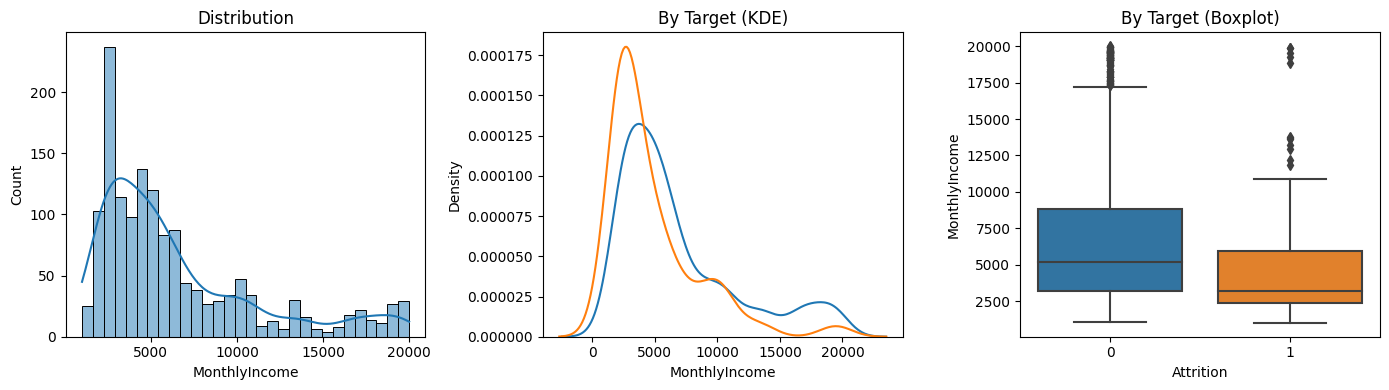

In [15]:
analyze_feature_by_target(df, 'MonthlyIncome')


‚ñ∂Ô∏è Feature: DistanceFromHome
Skewness: 0.96


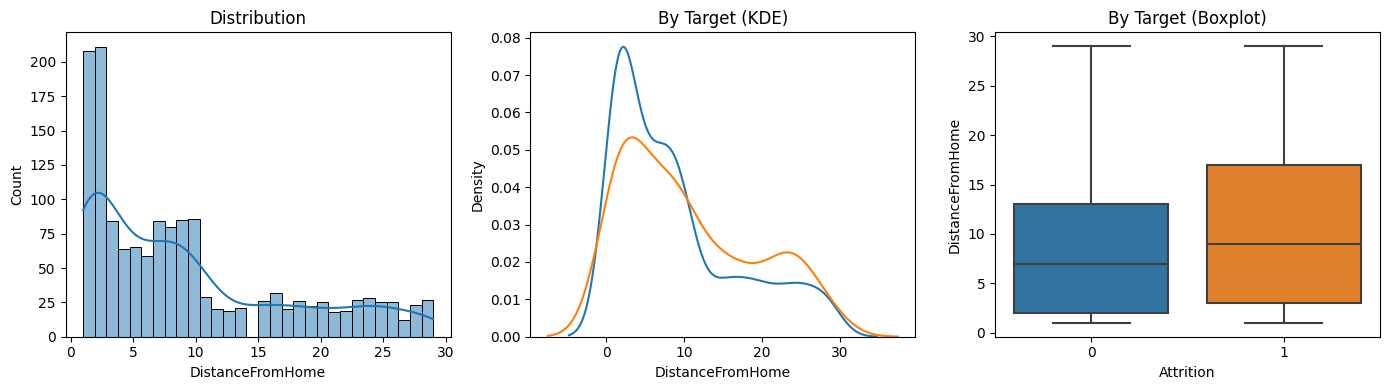

In [16]:
analyze_feature_by_target(df, 'DistanceFromHome')

## 4. Î™®Îç∏ ÌïôÏäµ

In [17]:
# X, y ÏÑ§Ï†ï 
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# train/test Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Î™®Îç∏ ÌïôÏäµ
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred = model.predict(X_test)

# ÌèâÍ∞Ä
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, y_pred))
print("\nÎ∂ÑÎ•ò Î¶¨Ìè¨Ìä∏:\n", classification_report(y_test, y_pred))
print("\nÌòºÎèô ÌñâÎ†¨:\n", confusion_matrix(y_test, y_pred))

Ï†ïÌôïÎèÑ: 0.8673469387755102

Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.72      0.28      0.40        47

    accuracy                           0.87       294
   macro avg       0.80      0.63      0.66       294
weighted avg       0.85      0.87      0.84       294


ÌòºÎèô ÌñâÎ†¨:
 [[242   5]
 [ 34  13]]


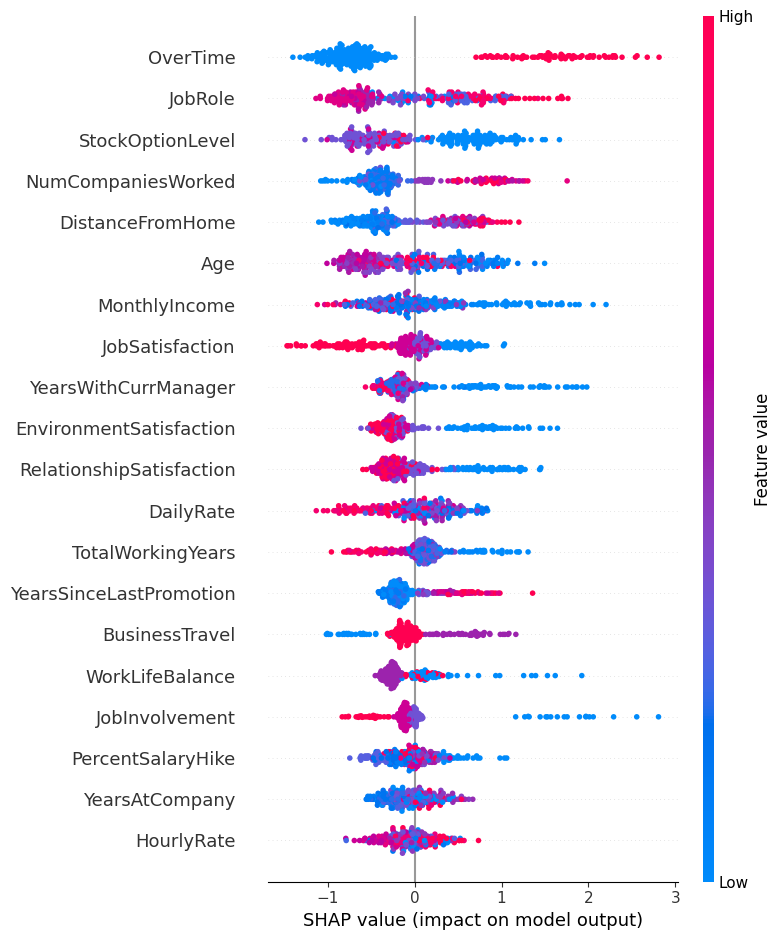

In [18]:
# SHAP explainer ÎßåÎì§Í∏∞
explainer = shap.Explainer(model, X_train)

# SHAP Í∞í Í≥ÑÏÇ∞ (Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞Î°ú)
shap_values = explainer(X_test)

# Summary Plot (Ï†ÑÏ≤¥ ÌîºÏ≤ò Ï§ëÏöîÎèÑ + ÏòÅÌñ• ÏãúÍ∞ÅÌôî)
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

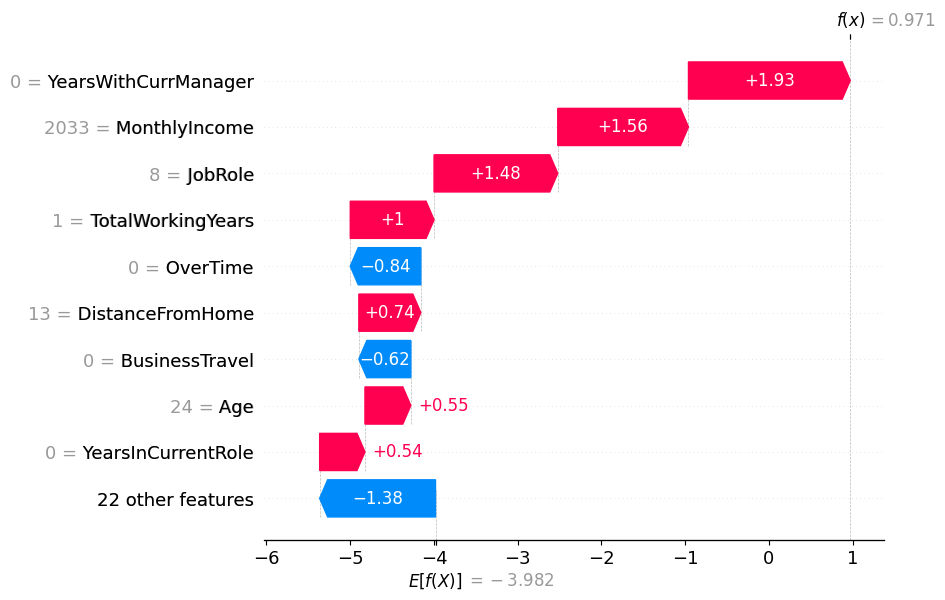

In [19]:
# Waterfall plot
# ÏÉòÌîå ÌïôÏäµ
model.fit(X_train, y_train)

# SHAP explainer ÏÉùÏÑ± (Ìä∏Î¶¨ Î™®Îç∏Ïùº Í≤ΩÏö∞ TreeExplainer)
import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# 0Î≤àÏß∏ ÏÉòÌîåÏóê ÎåÄÌïú waterfall plot
shap.plots.waterfall(shap_values[0])

Í∏∞Ï§ÄÍ∞í E[f(x)] = -3.982 
> Î™®Îç∏Ïù¥ ÏïÑÎ¨¥ Ï†ïÎ≥¥ÎèÑ ÏóÜÏùÑ ÎïåÏùò Ï¥àÍ∏∞ ÏòàÏ∏°Í∞í

ÏµúÏ¢Ö ÏòàÏ∏°Í∞í f(x) = 0.971
> Ïù¥ ÏßÅÏõêÏù¥ Ïù¥ÏßÅÌï† ÌôïÎ•†Ïù¥ Îß§Ïö∞ ÎÜíÎã§Í≥† Î™®Îç∏Ïù¥ ÌåêÎã®ÌñàÎã§Îäî ÏùòÎØ∏ (Í±∞Ïùò 1Ïóê Í∞ÄÍπåÏõÄ)

ÌååÎûÄÏÉâ: Ïù¥ÏßÅ ÏòàÏ∏°ÏùÑ ÎÇÆÏ∂ò ÌîºÏ≤òÎì§ 
Îπ®Í∞ÑÏÉâ: Ïù¥ÏßÅ ÏòàÏ∏°ÏùÑ ÎÜíÏù∏ ÌîºÏ≤òÎì§ 

ÏµúÏ¢Ö Ìï¥ÏÑù: Ïù¥ ÏßÅÏõêÏùÄ ÏÉÅÏÇ¨ÏôÄ ÏùºÌïúÏßÄ ÏñºÎßà Ïïà ÎêòÏóàÍ≥†, Í∏âÏó¨Í∞Ä ÎÇÆÍ≥†, Ïã†ÏûÖÏù¥Î©∞, Ï†äÍ≥†, Í±∞Î¶¨Í∞Ä Î©ÄÎ©∞, ÏïºÍ∑ºÏù¥ ÏóÜÏùåÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Ïù¥ÏßÅ ÏòàÏ∏° Ï†êÏàòÍ∞Ä 0.971Î°ú Îß§Ïö∞ ÎÜíÏùå. 
> Ìï¥Îãπ ÏßÅÏõêÏùÄ Ï†ÅÍ∑πÏ†ÅÏù∏ Î¶¨ÌÖêÏÖò Ï°∞ÏπòÍ∞Ä ÌïÑÏöîÌïòÎã§. 

In [20]:
# f(x) Í∞íÎì§ Ï∂îÏ∂ú (ÏòàÏ∏°Í∞í = Î™®Îç∏Ïùò Î°úÏßÅ Ï∂úÎ†•)
fx_values = shap_values.values.sum(axis=1) + explainer.expected_value

# Ïù¥ÏßÅ ÌôïÎ•† ÎÜíÏùÄ ÏÉòÌîå ÏÉÅÏúÑ 5Í∞ú Ïù∏Îç±Ïä§ ÌôïÏù∏
top_indices = np.argsort(fx_values)[-5:][::-1]
print("Ïù¥ÏßÅ ÏòàÏ∏° ÌôïÎ•†Ïù¥ ÎÜíÏùÄ ÏÉòÌîå Ïù∏Îç±Ïä§:", top_indices)

Ïù¥ÏßÅ ÏòàÏ∏° ÌôïÎ•†Ïù¥ ÎÜíÏùÄ ÏÉòÌîå Ïù∏Îç±Ïä§: [200 276  92 287 223]


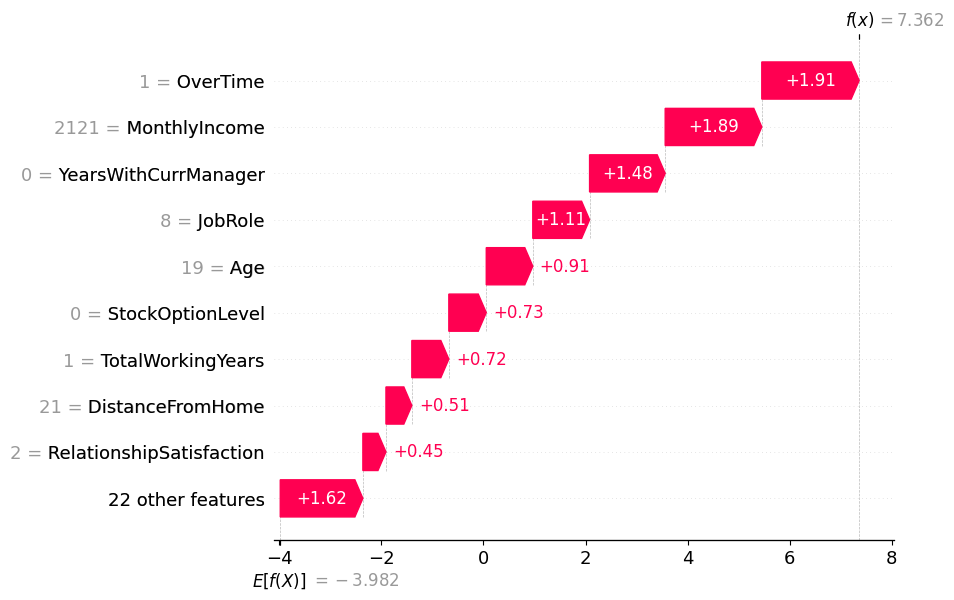

In [21]:
shap.plots.waterfall(shap_values[top_indices[0]])

In [22]:
# 1. RFEÎ°ú ÏÉÅÏúÑ 10Í∞ú ÌîºÏ≤ò ÏÑ†ÌÉù (Í∏∞Ï§Ä Î™®Îç∏: ÎûúÎç§Ìè¨Î†àÏä§Ìä∏)
rfe_model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rfe_model, n_features_to_select=10)
X_selected = rfe.fit_transform(X, y)

# ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Ïù¥Î¶Ñ ÌôïÏù∏ (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
selected_features = X.columns[rfe.support_]
print("ÏÑ†ÌÉùÎêú ÌîºÏ≤ò:\n", selected_features)

# 2. XGBoost Î™®Îç∏Î°ú ÌïôÏäµ Î∞è ÌèâÍ∞Ä
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb_model, X_selected, y, cv=cv, scoring='accuracy')

print(f"\nüéØ XGBoost (ÏÑ†ÌÉùÎêú 10Í∞ú ÌîºÏ≤ò) ÍµêÏ∞®Í≤ÄÏ¶ù ÌèâÍ∑† Ï†ïÌôïÎèÑ: {scores.mean():.4f}")

ÏÑ†ÌÉùÎêú ÌîºÏ≤ò:
 Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'OverTime', 'TotalWorkingYears', 'YearsAtCompany',
       'MonthlyIncome_log'],
      dtype='object')

üéØ XGBoost (ÏÑ†ÌÉùÎêú 10Í∞ú ÌîºÏ≤ò) ÍµêÏ∞®Í≤ÄÏ¶ù ÌèâÍ∑† Ï†ïÌôïÎèÑ: 0.8367


In [23]:
# X, y ÏÑ§Ï†ï 
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# train/test Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

pos = y_train.sum()
neg = len(y_train) - pos
scale = neg / pos

# Î™®Îç∏ ÌïôÏäµ
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',scale_pos_weight=scale, random_state=42)
model.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred = model.predict(X_test)

# ÌèâÍ∞Ä
print("Ï†ïÌôïÎèÑ:", accuracy_score(y_test, y_pred))
print("\nÎ∂ÑÎ•ò Î¶¨Ìè¨Ìä∏:\n", classification_report(y_test, y_pred))
print("\nÌòºÎèô ÌñâÎ†¨:\n", confusion_matrix(y_test, y_pred))

Ï†ïÌôïÎèÑ: 0.8571428571428571

Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.59      0.34      0.43        47

    accuracy                           0.86       294
   macro avg       0.74      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294


ÌòºÎèô ÌñâÎ†¨:
 [[236  11]
 [ 31  16]]


In [24]:
# Í≤∞Í≥º Ï†ÄÏû•Ïö©
results = []

# Í≥µÌÜµ Ìï®Ïàò Ï†ïÏùò
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"\nüìå {name} Í≤∞Í≥º")
    print(f"Accuracy: {acc:.4f}, Recall: {recall:.4f}, AUC: {auc:.4f}")
    print(classification_report(y_test, y_pred))

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Recall': recall,
        'AUC': auc
    })

# 1. Logistic Regression (Ïä§ÏºÄÏùºÎßÅ ÌïÑÏöî)
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000))
])
evaluate_model('Logistic Regression', lr_pipeline)

# 2. Random Forest
rf = RandomForestClassifier(random_state=42)
evaluate_model('Random Forest', rf)

# 3. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
evaluate_model('XGBoost', xgb)

# 4. LightGBM
lgbm = LGBMClassifier(random_state=42)
evaluate_model('LightGBM', lgbm)

# 5. CatBoost (silent=True)
cat = CatBoostClassifier(verbose=0, random_state=42)
evaluate_model('CatBoost', cat)

# Í≤∞Í≥º DataFrame Ï∂úÎ†•
results_df = pd.DataFrame(results).sort_values(by='Recall', ascending=False)
print("\nüéØ Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê Í≤∞Í≥º (Recall Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨):")
display(results_df)


üìå Logistic Regression Í≤∞Í≥º
Accuracy: 0.8776, Recall: 0.3830, AUC: 0.8081
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.72      0.38      0.50        47

    accuracy                           0.88       294
   macro avg       0.81      0.68      0.72       294
weighted avg       0.86      0.88      0.86       294


üìå Random Forest Í≤∞Í≥º
Accuracy: 0.8265, Recall: 0.0638, AUC: 0.7805
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       247
           1       0.30      0.06      0.11        47

    accuracy                           0.83       294
   macro avg       0.57      0.52      0.50       294
weighted avg       0.76      0.83      0.78       294


üìå XGBoost Í≤∞Í≥º
Accuracy: 0.8673, Recall: 0.2766, AUC: 0.7747
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1      

Model  Accuracy    Recall       AUC
0  Logistic Regression  0.877551  0.382979  0.808080
2              XGBoost  0.867347  0.276596  0.774744
3             LightGBM  0.853741  0.234043  0.794642
4             CatBoost  0.860544  0.191489  0.812645
1        Random Forest  0.826531  0.063830  0.780515